# Data Exploration

### Imports


In [109]:
import pandas as pd
import numpy as np
from tqdm import tqdm


<div class="alert alert-block alert-warning">
<b>Dask:</b> Multiprocessing package that can be used for (almost all) Pandas & Scikit-learn functionality.
 Ships with Anaconda, but not with MiniConda.
</div>

In [110]:
import dask
import dask.dataframe as dd   # denk dat we het wel redden met pandas sequential 
# from sklearn.grid_search import GridSearchCV
#from dklearn.grid_search import GridSearchCV   # voorbeeld van dklearn => dit gaan we zeker nodig hebben bij hyperopt etc.
import dask
from dask.distributed import Client
client = Client() # often http://localhost:8787/status

C:\Users\Titus\Anaconda3\envs\DMT\lib\site-packages\distributed\node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52872 instead
  http_address["port"], self.http_server.port


### Load Data In

In [111]:
df = pd.read_csv('2nd-assignment-dmt-2021/training_set_VU_DM.csv', parse_dates=['date_time'])
display(df)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [112]:
mem_size = df.memory_usage(index=True).sum() / 1_024**2

print(f"Size in Memory: {mem_size:.0f} MB")

Size in Memory: 2043 MB


In [113]:
# Inspect inferred types
display(df.dtypes)

# Inspect numerical ranges
print('Min. Values')
print(df.min())

print('Max. Values')
print(df.max())

srch_id                                 int64
date_time                      datetime64[ns]
site_id                                 int64
visitor_location_country_id             int64
visitor_hist_starrating               float64
visitor_hist_adr_usd                  float64
prop_country_id                         int64
prop_id                                 int64
prop_starrating                         int64
prop_review_score                     float64
prop_brand_bool                         int64
prop_location_score1                  float64
prop_location_score2                  float64
prop_log_historical_price             float64
position                                int64
price_usd                             float64
promotion_flag                          int64
srch_destination_id                     int64
srch_length_of_stay                     int64
srch_booking_window                     int64
srch_adults_count                       int64
srch_children_count               

Min. Values
srch_id                                          1
date_time                      2012-11-01 00:08:29
site_id                                          1
visitor_location_country_id                      1
visitor_hist_starrating                       1.41
visitor_hist_adr_usd                           0.0
prop_country_id                                  1
prop_id                                          1
prop_starrating                                  0
prop_review_score                              0.0
prop_brand_bool                                  0
prop_location_score1                           0.0
prop_location_score2                           0.0
prop_log_historical_price                      0.0
position                                         1
price_usd                                      0.0
promotion_flag                                   0
srch_destination_id                              2
srch_length_of_stay                              1
srch_booking_window

In [114]:
# data types

# # memory + speed improvements
# optimal_dtypes = {'srch_id': np.uint32,
#                   'site_id': np.uint32,
#                   'visitor_location_country_id': np.uint8,
#                   'prop_country_id': np.uint8,
#                   'prop_id': np.uint32,
#                   'prop_starrating': np.uint8,
#                   'prop_brand_bool': np.uint8,
#                   'promotion_flag': (np.uint8,
#                   'srch_destination_id': np.uint16,
#                   'srch_length_of_stay': np.uint16,
#                   'srch_booking_window': np.uint16,
#                   'srch_adults_count': np.uint8,
#                   'srch_children_count': np.uint8,  # 255 kids max should suffice
#                   'srch_room_count': np.uint8,
#                   'srch_saturday_night_bool': np.uint8,
#                   'random_bool': np.uint8,
#                   'position': np.uint8,
#                   'click_bool': np.uint8,
#                   'booking_bool': np.uint8}
#
# for i in range(1, 9):
#     optimal_dtypes[f'comp{i}_rate'] = np.int8,
#     optimal_dtypes[f'comp{i}_inv'] = np.int8,     # assignment does not specify -1 but is exists??
#     # competitor_dtypes[f'comp{i}_rate_percent_diff'] = np.uint


# dfn = df.dtypes(optimal_dtypes)
# print(dfn.dtypes)


## Exploration

#### Note: df.shape[0] should be replaced everywhere, since we have varying amount of properties per srch_id

### Count of unique values per column:

In [115]:
uniques = df.nunique()
display(uniques)

srch_id                        199795
date_time                      198615
site_id                            34
visitor_location_country_id       210
visitor_hist_starrating           312
visitor_hist_adr_usd             7799
prop_country_id                   172
prop_id                        129113
prop_starrating                     6
prop_review_score                  10
prop_brand_bool                     2
prop_location_score1              337
prop_location_score2             9342
prop_log_historical_price         392
position                           40
price_usd                       76465
promotion_flag                      2
srch_destination_id             18127
srch_length_of_stay                36
srch_booking_window               429
srch_adults_count                   9
srch_children_count                10
srch_room_count                     8
srch_saturday_night_bool            2
srch_query_affinity_score      199387
orig_destination_distance      530595
random_bool 

### % missing values per column

In [116]:
missing_percent = 100 * df.isnull().sum() / df.shape[0]
display(missing_percent)

filled_columns = missing_percent[missing_percent == 0].index.tolist()
print("Non-missing columns:")
display(filled_columns)

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

Non-missing columns:


['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'random_bool',
 'click_bool',
 'booking_bool']

### Searches per website

In [117]:
groupby_website = df.groupby('site_id')['srch_id'].count() / df['srch_id'].count()

site_searches =  groupby_website.sort_values(ascending=False)
display(site_searches)
# site 5 == 'expedia.com'??

site_id
5     0.622386
14    0.097142
15    0.062680
24    0.047967
32    0.035764
18    0.025693
16    0.018158
12    0.014902
19    0.008623
9     0.008505
22    0.008120
11    0.006989
7     0.006467
29    0.005945
31    0.004925
26    0.003264
4     0.002722
25    0.002481
23    0.002344
1     0.002207
34    0.002006
10    0.001888
13    0.001655
17    0.001247
2     0.001117
27    0.001026
28    0.000871
30    0.000786
21    0.000737
3     0.000703
6     0.000509
33    0.000134
20    0.000032
8     0.000006
Name: srch_id, dtype: float64

### Clicks/Books per position, grouped by random_bool

In [118]:
# groupby_random_bool = df.groupby('random_bool')[['click_bool', 'booking_bool']].count()
groupby_position = df.groupby(['random_bool', 'position'])[['click_bool', 'booking_bool']].sum()
groupby_random_bool = groupby_position.groupby('random_bool').sum()
click_book_ratio = groupby_position / groupby_random_bool
display(groupby_position)
display(groupby_random_bool)
display(click_book_ratio)

click_bool  booking_bool
random_bool position                          
0           1              29908         27014
            2              20271         17976
            3              15381         13385
            4              12267         10593
            5                149            98
...                          ...           ...
1           36               308            25
            37               157            12
            38                32             4
            39                 7             2
            40                 0             0

[80 rows x 2 columns]

,click_bool,booking_bool
random_bool,,
0,153502,130578
1,68377,7812


click_bool  booking_bool
random_bool position                          
0           1           0.194838      0.206880
            2           0.132057      0.137665
            3           0.100201      0.102506
            4           0.079914      0.081124
            5           0.000971      0.000751
...                          ...           ...
1           36          0.004504      0.003200
            37          0.002296      0.001536
            38          0.000468      0.000512
            39          0.000102      0.000256
            40          0.000000      0.000000

[80 rows x 2 columns]

### Location distributions

In [119]:
groupby_home_country = df.groupby('visitor_location_country_id')['srch_id'].count()
distribution_home_country = 100 * (groupby_home_country / df.shape[0]).sort_values(ascending=False)
display(distribution_home_country)
# Country 219 == USA??
# Country 100 == UK??

groupby_prop_country = df.groupby('prop_country_id')['srch_id'].count()
distribution_prop_country = 100 * (groupby_prop_country / df.shape[0]).sort_values(ascending=False)
display(distribution_prop_country)

groupby_destination_id = df.groupby('srch_destination_id')['srch_id'].count()
distribution_destination_id = 100 * (groupby_destination_id / df.shape[0]).sort_values(ascending=False)
display(distribution_destination_id)

# 8192 == NYC??
# 4562 == LA?? Miami??


visitor_location_country_id
219    58.335752
100     9.992766
55      5.858021
216     4.384223
220     3.515204
         ...    
226     0.000504
190     0.000484
146     0.000303
83      0.000262
150     0.000161
Name: srch_id, Length: 210, dtype: float64

prop_country_id
219    61.111596
100     6.277959
55      3.760628
31      3.111662
99      2.730507
         ...    
180     0.000242
7       0.000202
126     0.000141
204     0.000101
165     0.000040
Name: srch_id, Length: 172, dtype: float64

srch_destination_id
8192     1.408373
4562     1.151392
9402     0.819406
8347     0.671070
10979    0.670869
           ...   
23013    0.000101
15285    0.000101
19515    0.000101
541      0.000101
10492    0.000101
Name: srch_id, Length: 18127, dtype: float64

### Bookings seasonality

,date_time,booking_start
0,2013-04-04 08:32:15,2013-04-04 08:32:15
1,2013-04-04 08:32:15,2013-04-04 08:32:15
2,2013-04-04 08:32:15,2013-04-04 08:32:15
3,2013-04-04 08:32:15,2013-04-04 08:32:15
4,2013-04-04 08:32:15,2013-04-04 08:32:15
...,...,...
4958342,2013-06-30 19:55:18,2013-07-21 19:55:18
4958343,2013-06-30 19:55:18,2013-07-21 19:55:18
4958344,2013-06-30 19:55:18,2013-07-21 19:55:18
4958345,2013-06-30 19:55:18,2013-07-21 19:55:18


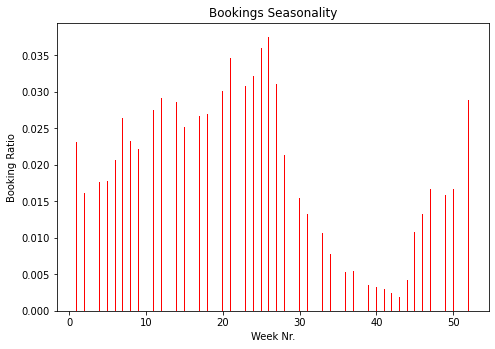

In [120]:
df['booking_start'] = df['date_time'] + pd.to_timedelta(df['srch_booking_window'], unit='D')  # speedup with vectorize?
display(df[['date_time', 'booking_start']])
df['booking_start_weeknr'] = df['booking_start'].dt.isocalendar().week

groupby_weeknr = df.groupby('booking_start_weeknr')['srch_id'].count()
distr_weeknr = groupby_weeknr / df.shape[0]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = distr_weeknr.index.tolist()
y = distr_weeknr.values

ax.bar(x, y, 0.1, color='r')
ax.set_ylabel('Booking Ratio')
ax.set_xlabel('Week Nr.')
ax.set_title('Bookings Seasonality')
ax.set_title('Bookings Seasonality')
plt.show()

## Fill Na


In [121]:
# TODO: prop_review_score by average of hotel?






